In [1]:
import seaborn as sns 
import pandas as pd
import numpy as np
from collections import Counter
from scipy import stats
import sys
import os
import matplotlib.pyplot as plt

In [2]:
path = os.path.dirname(os.path.abspath('__file__'))+'\\Prepared_tables\\'
df = pd.read_csv(path + 'Prep_Protein Groups_cut0_notimuted.csv', low_memory=False)

df['SubMitoLocalization'] = [df['SubMitoLocalization'][i] if str(df['SubMitoLocalization'][i]) !='nan' else '' for i in range(len(df))]
df['IMPI_new'] = [df['IMPI_new'][i] if str(df['IMPI_new'][i]) !='nan' else '' for i in range(len(df))]

C:\Users\fhansen\AppData\Local\Temp\ipykernel_30152\1363031913.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Total IDs','Summed\n Intensity'],size='xx-large', family='Arial')
C:\Users\fhansen\AppData\Local\Temp\ipykernel_30152\1363031913.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Total IDs','Summed\n Intensity'],size='xx-large', family='Arial')
C:\Users\fhansen\AppData\Local\Temp\ipykernel_30152\1363031913.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Total IDs','Summed\n Intensity'],size='xx-large', family='Arial')
C:\Users\fhansen\AppData\Local\Temp\ipykernel_30152\1363031913.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Total IDs','Summed\n Intensity'],size='xx-large', family='Arial')
C:\Users\fhansen\AppData\Local\Temp\ipykernel_30152\1363

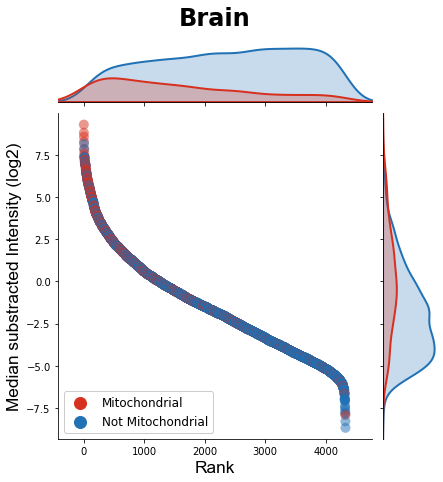

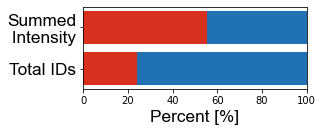

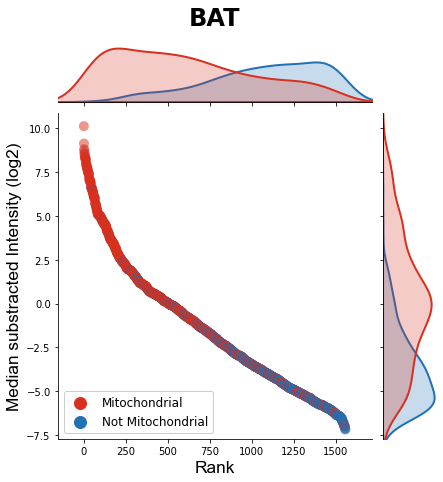

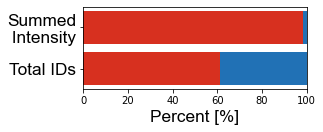

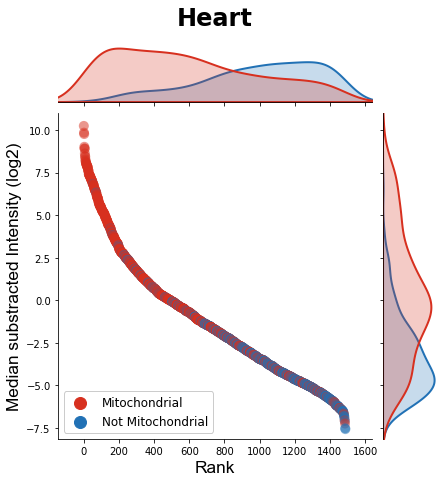

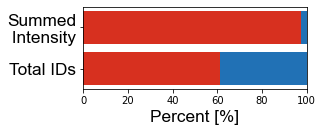

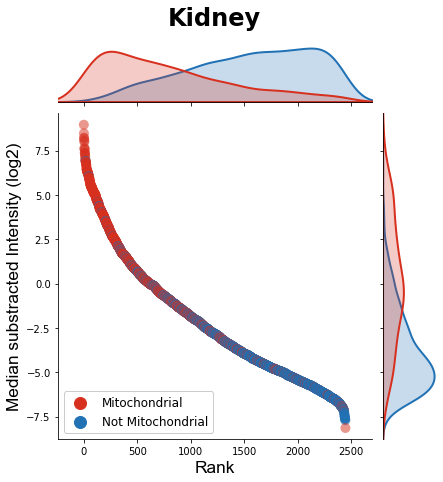

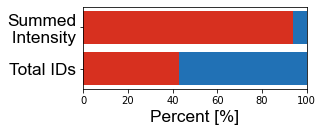

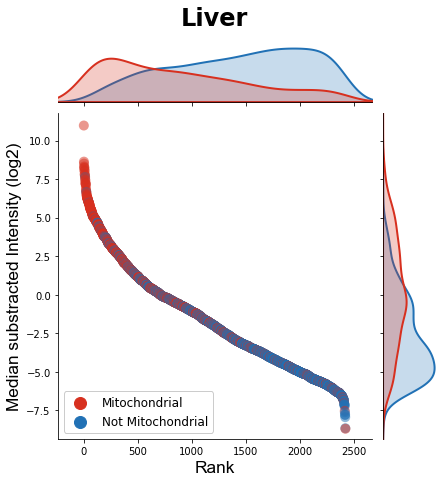

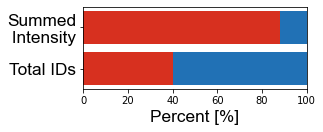

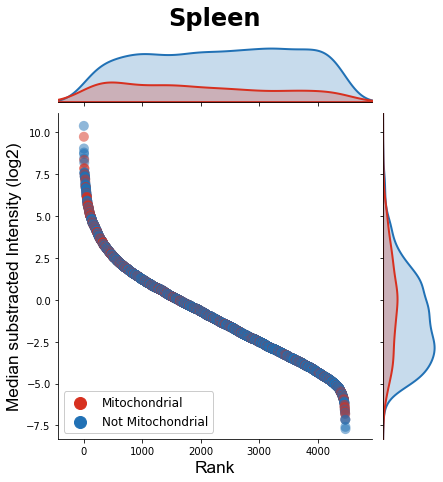

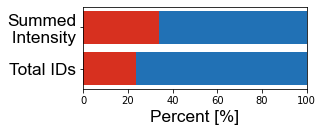

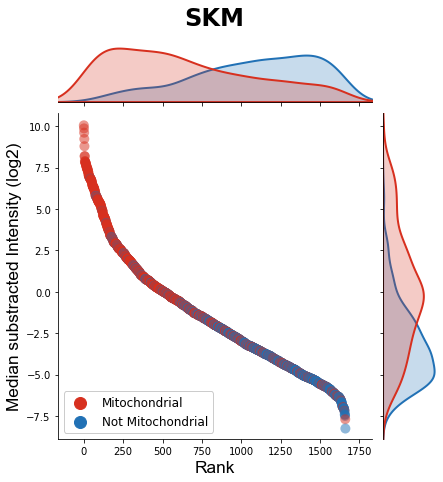

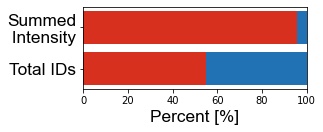

In [3]:
counter = 0
fig_row = 0
fig_col = 0
ID_all = []
ID_Mito = []
ID_Mito_quant = []
path_saving = os.path.dirname(os.path.abspath('__file__'))+'\\raw_figures\\Figure_2\\'

for T in ['B_','BAT_','H_','K_','L_','S_','SKM_']:
    
    Tissues = ['Brain','BAT','Heart', 'Kidney', 'Liver', 'Spleen', 'SKM']
    colors = ['#fc8d59','#74a9cf']
    colors = ['#d7301f','#2171b5'] 
    
    col = []
    Tab = pd.DataFrame()
    [col.append(i) for i in range(len(list(df.columns))) if df.columns[i].find('Norm_Intensity '+T)==0]
    Tab['Count'] = df.iloc[:,col].count(1)
    Tab['Norm_Int'] = df.iloc[:,col].median(1)
    Tab['GO_CC'] = df['GO_CC']
    Tab['SubMitoLocalization'] = df['SubMitoLocalization']
    Tab['IMPI_new'] = df['IMPI_new']
    
    Tab = Tab[Tab['Count']>0].sort_values(by=['Norm_Int'],ascending= False).reset_index(drop= True).reset_index()
    Tab['Mito_filt'] = ['Mitochondrial' if (Tab['SubMitoLocalization'][i]!='' or('Verified mitochondrial' in Tab['IMPI_new'][i])==True ) else 'Not Mitochondrial' for i in range(len(Tab))]
    #Tab_2 = Tab[Tab['Mito_filt']=='Not Mitochondrial'].reset_index(drop=True).reset_index()
    #Tab_2['Membrane'] = ['Membrane' if (('synapse [GO:0045202]' in Tab_2['GO_CC'][i])==True) #or 
    #                                    #('membrane [GO:0016020]' in Tab_2['GO_CC'][i])==True or
    #                                            #('plasma membrane [GO:0005886]' in Tab_2['GO_CC'][i])==True) 
    #                        else 'Not Membrane' for i in range(len(Tab_2))]
    Tab_quant = Tab[Tab['Count']>2].sort_values(by=['Norm_Int'],ascending= False).reset_index(drop= True).reset_index()
    Tab_quant['Mito_filt'] = ['Mitochondrial' if (Tab_quant['SubMitoLocalization'][i]!='' or('Verified mitochondrial' in Tab_quant['IMPI_new'][i])==True ) else 'Not Mitochondrial' for i in range(len(Tab_quant))]
        
    
    
    g = sns.JointGrid(xlim=(-0.1*len(Tab), 1.1*len(Tab)), ylim=(Tab['Norm_Int'].min()*1.075,Tab['Norm_Int'].max()*1.075))
    x, y = Tab["index"], Tab["Norm_Int"]
    z=  sns.scatterplot(x=x, y=y, ec="none", s=100, linewidth=.5,alpha = 0.5, hue = Tab['Mito_filt'], hue_order= ['Mitochondrial','Not Mitochondrial'],ax=g.ax_joint,palette=colors)#.set(xlabel='Rank', ylabel='Median substracted Intensity (log2)')
    #z.set(xlabel='Rank', ylabel='Median substracted Intensity (log2)', title = T)
    z.set_xlabel('Rank', size='xx-large', family='Arial')
    z.set_ylabel('Median substracted Intensity (log2)', size='xx-large', family='Arial')
    z.tick_params(axis='both', labelsize='medium')
    z.legend(fontsize='large', loc = 'lower left', facecolor='white', framealpha = 1, markerscale = 2)
    z.set_facecolor("white")
    #z.yaxis.grid(True, color='black', alpha = 0.5)
    #z.xaxis.grid(True, color='black', alpha = 0.5)
    z.spines['bottom'].set_color('black')
    z.spines['left'].set_color('black')
    z.tick_params(bottom=True, left=True)
    z.set_title(Tissues[counter], y=1.25,size=24, fontweight='bold')
    u = sns.kdeplot(x=x, fill=True, linewidth=2, hue = Tab['Mito_filt'], hue_order= ['Mitochondrial','Not Mitochondrial'],legend= False, ax=g.ax_marg_x,palette=colors)
    u.set_facecolor("white")
    u.spines['bottom'].set_color('black')
    u.tick_params(bottom=True, left=False)
    v = sns.kdeplot(y=y,fill=True, linewidth=2, hue = Tab['Mito_filt'], hue_order= ['Mitochondrial','Not Mitochondrial'], legend= False,ax=g.ax_marg_y,palette=colors)
    v.set_facecolor("white")
    v.spines['left'].set_color('black')
    v.tick_params(bottom=False, left=True)
    

    
    
    plt.savefig(path_saving+'Rank_Mito_vs_notMito_'+Tissues[counter]+'.pdf',  bbox_inches = "tight")
    
    
    Tab['Norm_Int_raw'] =  np.power(2,Tab['Norm_Int'])
    Int_all = Tab['Norm_Int_raw'].sum()
    Int_Mito = sum([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if (Tab['SubMitoLocalization'][i]!='' or
                                                                         ('Verified mitochondrial' in Tab['IMPI_new'][i])==True)])# or 
                                                                         #('Predicted mitochondrial' in Tab['IMPI_new'][i])==True)])
    Int_NonMito = sum([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if (Tab['SubMitoLocalization'][i]=='' and
                                                                            ('Verified mitochondrial' in Tab['IMPI_new'][i])!=True)])
                                                                            #and ('Predicted mitochondrial' in Tab['IMPI_new'][i])!=True)])
    
    
    ID_Num_all = len(Tab['Norm_Int_raw'])
    ID_Num_Mito = len([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if (Tab['SubMitoLocalization'][i]!='' or
                                                                         ('Verified mitochondrial' in Tab['IMPI_new'][i])==True)])# or 
                                                                         #('Predicted mitochondrial' in Tab['IMPI_new'][i])==True)])
    ID_Num_NonMito = len([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if (Tab['SubMitoLocalization'][i]=='' and
                                                                            ('Verified mitochondrial' in Tab['IMPI_new'][i])!=True)]) 
                                                                            #and ('Predicted mitochondrial' in Tab['IMPI_new'][i])!=True)])
    
    Tab_quant['Norm_Int_raw'] =  np.power(2,Tab_quant['Norm_Int'])
    ID_Num_Mito_quant = len([Tab_quant['Norm_Int_raw'][i]  for i in range(len(Tab_quant)) if (Tab_quant['SubMitoLocalization'][i]!='' or
                                                                         ('Verified mitochondrial' in Tab_quant['IMPI_new'][i])==True)])# or 
                                                                         #('Predicted mitochondrial' in Tab_quant['IMPI_new'][i])==True)])    

    ID_perc_Mito = ID_Num_Mito/ID_Num_all*100
    ID_perc_NonMito = ID_Num_NonMito/ID_Num_all*100
    
    #print(ID_perc_Mito, ID_perc_NonMito)
    
    Int_perc_Mito = Int_Mito/Int_all*100
    Int_perc_NonMito = Int_NonMito/Int_all*100
    
    #print(Int_perc_Mito, Int_perc_NonMito)
    
    fig, ax1 = plt.subplots(figsize=(4, 1.5))
    Bar_Mito = np.array([ID_perc_Mito, Int_perc_Mito])
    Bar_NonMito = np.array([ID_perc_NonMito, Int_perc_NonMito])
    Pos = [ 'ID number','Intensity']
    ax1.barh(Pos,Bar_Mito,color= colors[0])
    ax1.barh(Pos,Bar_NonMito, left = Bar_Mito,color= colors[1])
    
    ax1.set_xlabel('Percent [%]',size='xx-large', family='Arial')
    ax1.set_yticklabels(['Total IDs','Summed\n Intensity'],size='xx-large', family='Arial')
    ax1.set_xlim([0, 100])
    ax1.set_facecolor("white")
    #plt.savefig(path_saving+'Bar_Mito_vs_notMito_'+Tissues[counter]+'.pdf',  bbox_inches = "tight")
    
    
    
    ID_all.append(ID_Num_all) 
    ID_Mito.append(ID_Num_Mito) 
    ID_Mito_quant.append(ID_Num_Mito_quant) 

    counter = counter+1

In [4]:
set(Tab['IMPI_new'])

{'',
 'Ancillary',
 'Ancillary;Ancillary',
 'Ancillary;Ancillary;Ancillary',
 'Ancillary;Ancillary;Ancillary;Ancillary',
 'Ancillary;Ancillary;Ancillary;Ancillary;Ancillary',
 'Ancillary;Ancillary;Ancillary;Ancillary;NA',
 'Ancillary;Ancillary;Ancillary;NA;NA;Ancillary',
 'Ancillary;Ancillary;NA',
 'Ancillary;Ancillary;NA;Ancillary',
 'Ancillary;Ancillary;NA;Ancillary;Ancillary;Ancillary',
 'Ancillary;Ancillary;NA;NA',
 'Ancillary;Ancillary;NA;NA;Ancillary;Ancillary',
 'Ancillary;NA',
 'Ancillary;NA;Ancillary',
 'Ancillary;NA;Ancillary;NA;NA',
 'Ancillary;NA;NA',
 'Ancillary;NA;NA;NA',
 'Associated',
 'Associated;Associated',
 'Associated;Associated;Associated',
 'Associated;Associated;Associated;Associated',
 'Associated;Associated;Associated;Associated;Associated',
 'Associated;Associated;Associated;NA',
 'Associated;Associated;NA',
 'Associated;NA',
 'Dubious gene',
 'Dubious gene;Dubious gene',
 'Dubious gene;NA',
 'NA;Ancillary',
 'NA;Ancillary;Ancillary;Ancillary;Ancillary',
 'NA

In [5]:
def get_mito_annotation(df):    
    mitochondrial = []
    for i in range(len(df)):
        if 'Verified mitochondrial' in df['IMPI_new'][i] or df['SubMitoLocalization'][i]!='':
            mitochondrial.append('Mitochondrial')
        elif 'Ancillary' in df['IMPI_new'][i] or 'Associated' in df['IMPI_new'][i]:
            mitochondrial.append('Associated')
        else:
            mitochondrial.append('Not Mitochondrial')
            
    return mitochondrial


In [6]:
'Ancillary' in Tab_quant['IMPI_new'][4]
#Tab_quant['IMPI_new'][4]

False

{'Mitochondrial', 'Not Mitochondrial', 'Associated'}
{'Mitochondrial', 'Not Mitochondrial', 'Associated'}
24.093324093324092 4.527604527604527 71.37907137907138
55.443828490163774 7.783765105641326 36.77240640419496
{'Mitochondrial', 'Not Mitochondrial', 'Associated'}
{'Mitochondrial', 'Not Mitochondrial', 'Associated'}


C:\Users\fhansen\AppData\Local\Temp\ipykernel_30152\3857086463.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Total IDs','Summed\n Intensity'],size='xx-large', family='Arial')


61.449647209749834 4.425914047466325 34.12443874278384
98.22169822507868 0.31066346795681615 1.4676383069645484
{'Mitochondrial', 'Not Mitochondrial', 'Associated'}
{'Mitochondrial', 'Not Mitochondrial', 'Associated'}


C:\Users\fhansen\AppData\Local\Temp\ipykernel_30152\3857086463.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Total IDs','Summed\n Intensity'],size='xx-large', family='Arial')


61.047683008730694 4.5668233713901945 34.385493619879114
97.56785272800785 0.23379705425896827 2.198350217733118
{'Mitochondrial', 'Not Mitochondrial', 'Associated'}
{'Mitochondrial', 'Not Mitochondrial', 'Associated'}


C:\Users\fhansen\AppData\Local\Temp\ipykernel_30152\3857086463.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Total IDs','Summed\n Intensity'],size='xx-large', family='Arial')


42.752143732135565 5.104124132298898 52.143732135565536
94.14230181260793 0.6915074012147868 5.166190786177368
{'Mitochondrial', 'Not Mitochondrial', 'Associated'}
{'Mitochondrial', 'Not Mitochondrial', 'Associated'}


C:\Users\fhansen\AppData\Local\Temp\ipykernel_30152\3857086463.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Total IDs','Summed\n Intensity'],size='xx-large', family='Arial')


40.08247422680412 4.701030927835052 55.21649484536082
88.0840018646607 1.1915581048126833 10.724440030526607


C:\Users\fhansen\AppData\Local\Temp\ipykernel_30152\3857086463.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Total IDs','Summed\n Intensity'],size='xx-large', family='Arial')


{'Mitochondrial', 'Not Mitochondrial', 'Associated'}
{'Mitochondrial', 'Not Mitochondrial', 'Associated'}
23.70420017873101 5.160857908847185 71.1349419124218
33.81765214985076 14.415621428431812 51.766726421717514
{'Mitochondrial', 'Not Mitochondrial', 'Associated'}
{'Mitochondrial', 'Not Mitochondrial', 'Associated'}


C:\Users\fhansen\AppData\Local\Temp\ipykernel_30152\3857086463.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Total IDs','Summed\n Intensity'],size='xx-large', family='Arial')


54.933814681107094 5.234657039711191 39.83152827918171
95.81316276493314 0.7532086884009147 3.433628546665908


C:\Users\fhansen\AppData\Local\Temp\ipykernel_30152\3857086463.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Total IDs','Summed\n Intensity'],size='xx-large', family='Arial')


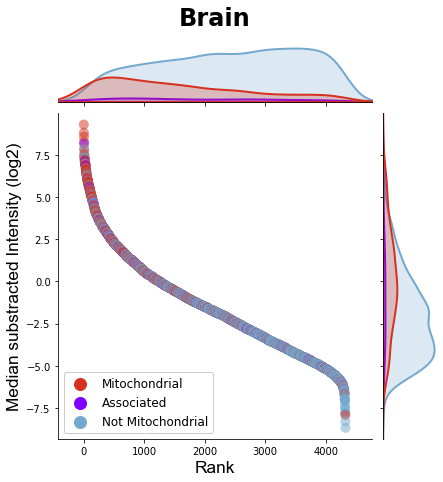

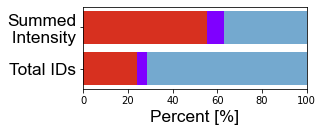

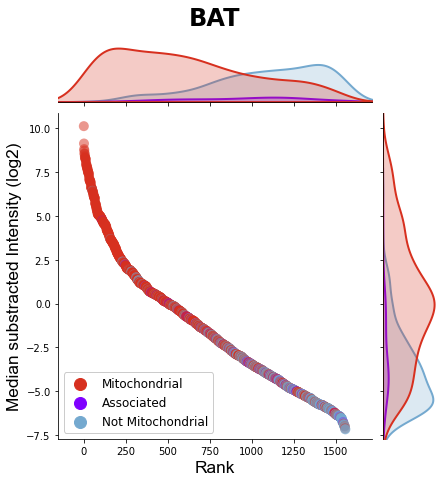

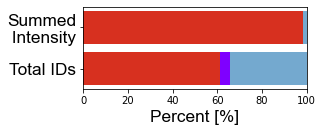

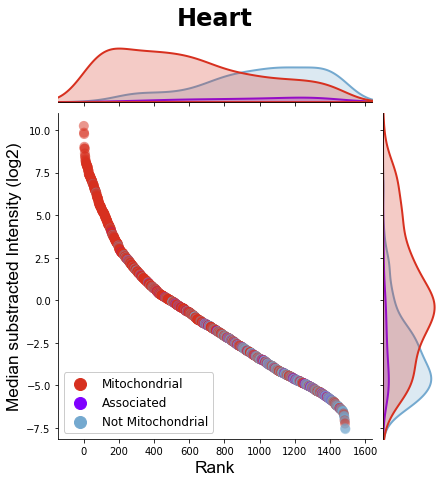

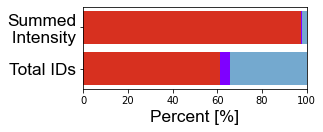

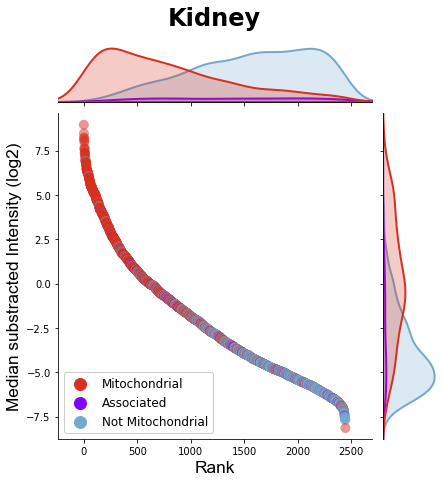

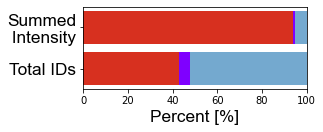

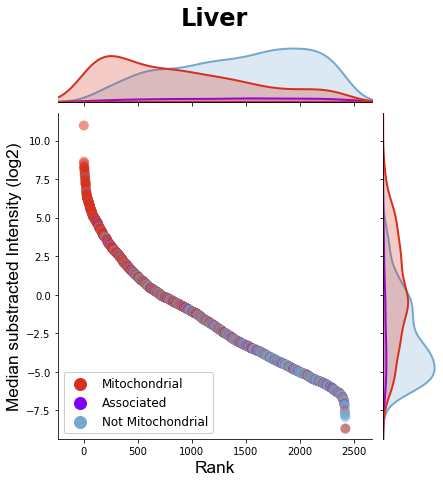

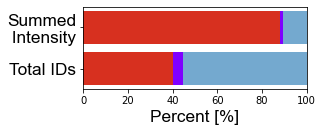

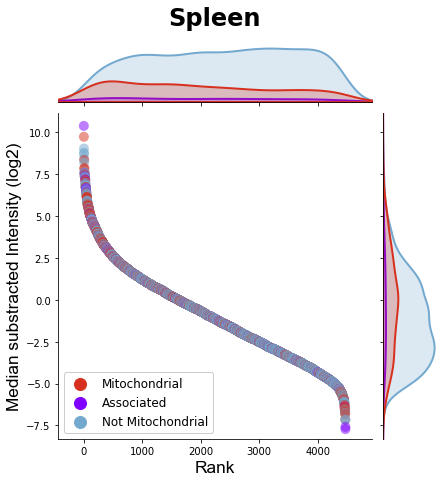

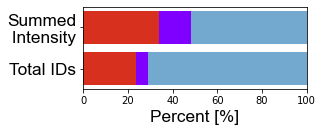

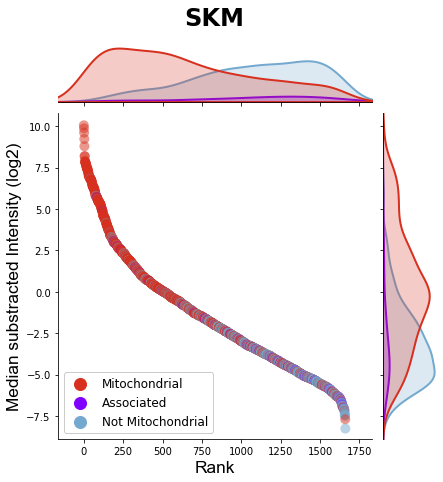

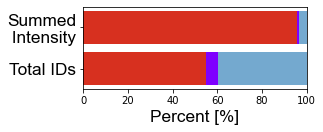

In [7]:
counter = 0
fig_row = 0
fig_col = 0
ID_all = []
ID_Mito = []
#ID_Mito_quant = []
path_saving = os.path.dirname(os.path.abspath('__file__'))+'\\raw_figures\\Figure_2\\'

for T in ['B_','BAT_','H_','K_','L_','S_','SKM_']:
    
    Tissues = ['Brain','BAT','Heart', 'Kidney', 'Liver', 'Spleen', 'SKM']
    #colors = ['#fc8d59','#74a9cf']
    colors = ['#d7301f','#7f00ff','#74a9cf'] 
    
    col = []
    Tab = pd.DataFrame()
    [col.append(i) for i in range(len(list(df.columns))) if df.columns[i].find('Norm_Intensity '+T)==0]
    Tab['Count'] = df.iloc[:,col].count(1)
    Tab['Norm_Int'] = df.iloc[:,col].median(1)
    Tab['GO_CC'] = df['GO_CC']
    Tab['SubMitoLocalization'] = df['SubMitoLocalization']
    Tab['IMPI_new'] = df['IMPI_new']
    
    Tab = Tab[Tab['Count']>0].sort_values(by=['Norm_Int'],ascending= False).reset_index(drop= True).reset_index()
    #Tab['Mito_filt'] = ['Mitochondrial' if (Tab['SubMitoLocalization'][i]!='' or('Verified mitochondrial' in Tab['IMPI_new'][i])==True ) else 'Not Mitochondrial' for i in range(len(Tab))]
    Tab['Mito_filt'] = get_mito_annotation(Tab)
    #Tab_2 = Tab[Tab['Mito_filt']=='Not Mitochondrial'].reset_index(drop=True).reset_index()
    #Tab_2['Membrane'] = ['Membrane' if (('synapse [GO:0045202]' in Tab_2['GO_CC'][i])==True) #or 
    #                                    #('membrane [GO:0016020]' in Tab_2['GO_CC'][i])==True or
    #                                            #('plasma membrane [GO:0005886]' in Tab_2['GO_CC'][i])==True) 
    #                        else 'Not Membrane' for i in range(len(Tab_2))]
    Tab_quant = Tab[Tab['Count']>2].sort_values(by=['Norm_Int'],ascending= False).reset_index(drop= True).reset_index()
    #Tab_quant['Mito_filt'] = ['Mitochondrial' if (Tab_quant['SubMitoLocalization'][i]!='' or('Verified mitochondrial' in Tab_quant['IMPI_new'][i])==True ) else 'Not Mitochondrial' for i in range(len(Tab_quant))]
    Tab_quant['Mito_filt'] = get_mito_annotation(Tab_quant)    
    print(set(Tab['Mito_filt']))
    print(set(Tab_quant['Mito_filt']))
    
    
    g = sns.JointGrid(xlim=(-0.1*len(Tab), 1.1*len(Tab)), ylim=(Tab['Norm_Int'].min()*1.075,Tab['Norm_Int'].max()*1.075))
    x, y = Tab["index"], Tab["Norm_Int"]
    z=  sns.scatterplot(x=x, y=y, ec="none", s=100, linewidth=.5,alpha = 0.5, hue = Tab['Mito_filt'], hue_order= ['Mitochondrial','Associated','Not Mitochondrial'],ax=g.ax_joint,palette=colors)#.set(xlabel='Rank', ylabel='Median substracted Intensity (log2)')
    #z.set(xlabel='Rank', ylabel='Median substracted Intensity (log2)', title = T)
    z.set_xlabel('Rank', size='xx-large', family='Arial')
    z.set_ylabel('Median substracted Intensity (log2)', size='xx-large', family='Arial')
    z.tick_params(axis='both', labelsize='medium')
    z.legend(fontsize='large', loc = 'lower left', facecolor='white', framealpha = 1, markerscale = 2)
    z.set_facecolor("white")
    #z.yaxis.grid(True, color='black', alpha = 0.5)
    #z.xaxis.grid(True, color='black', alpha = 0.5)
    z.spines['bottom'].set_color('black')
    z.spines['left'].set_color('black')
    z.tick_params(bottom=True, left=True)
    z.set_title(Tissues[counter], y=1.25,size=24, fontweight='bold')
    u = sns.kdeplot(x=x, fill=True, linewidth=2, hue = Tab['Mito_filt'], hue_order= ['Mitochondrial','Associated','Not Mitochondrial'],legend= False, ax=g.ax_marg_x,palette=colors)
    u.set_facecolor("white")
    u.spines['bottom'].set_color('black')
    u.tick_params(bottom=True, left=False)
    v = sns.kdeplot(y=y,fill=True, linewidth=2, hue = Tab['Mito_filt'], hue_order= ['Mitochondrial','Associated','Not Mitochondrial'], legend= False,ax=g.ax_marg_y,palette=colors)
    v.set_facecolor("white")
    v.spines['left'].set_color('black')
    v.tick_params(bottom=False, left=True)
    

    
    
    plt.savefig(path_saving+'Rank_Mito_vs_notMito_'+Tissues[counter]+'.pdf',  bbox_inches = "tight")
    
    
    Tab['Norm_Int_raw'] =  np.power(2,Tab['Norm_Int'])
    Int_all = Tab['Norm_Int_raw'].sum()
    
    Int_Mito = sum([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if Tab['Mito_filt'][i] =='Mitochondrial'])
    Int_Associated = sum([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if Tab['Mito_filt'][i] =='Associated'])
    Int_NonMito = sum([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if Tab['Mito_filt'][i] =='Not Mitochondrial'])
    #Int_Mito = sum([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if (Tab['SubMitoLocalization'][i]!='' or
    #                                                                     ('Verified mitochondrial' in Tab['IMPI_new'][i])==True)])# or 
    #                                                                     #('Predicted mitochondrial' in Tab['IMPI_new'][i])==True)])
    #Int_NonMito = sum([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if (Tab['SubMitoLocalization'][i]=='' and
    #                                                                        ('Verified mitochondrial' in Tab['IMPI_new'][i])!=True)])
    #                                                                        #and ('Predicted mitochondrial' in Tab['IMPI_new'][i])!=True)])
    
    
    ID_Num_all = len(Tab['Norm_Int_raw'])
    
    ID_Num_Mito = len([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if Tab['Mito_filt'][i] =='Mitochondrial'])
    ID_Num_Associated = len([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if Tab['Mito_filt'][i] =='Associated'])
    ID_Num_NonMito = len([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if Tab['Mito_filt'][i] =='Not Mitochondrial'])
    
    #ID_Num_Mito = len([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if (Tab['SubMitoLocalization'][i]!='' or
    #                                                                     ('Verified mitochondrial' in Tab['IMPI_new'][i])==True)])# or 
    #                                                                     #('Predicted mitochondrial' in Tab['IMPI_new'][i])==True)])
    #ID_Num_NonMito = len([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if (Tab['SubMitoLocalization'][i]=='' and
    #                                                                        ('Verified mitochondrial' in Tab['IMPI_new'][i])!=True)]) 
    #                                                                        #and ('Predicted mitochondrial' in Tab['IMPI_new'][i])!=True)])
    
    #Tab_quant['Norm_Int_raw'] =  np.power(2,Tab_quant['Norm_Int'])
    #ID_Num_Mito_quant = len([Tab_quant['Norm_Int_raw'][i]  for i in range(len(Tab_quant)) if (Tab_quant['SubMitoLocalization'][i]!='' or
    #                                                                     ('Verified mitochondrial' in Tab_quant['IMPI_new'][i])==True)])# or 
                                                                         #('Predicted mitochondrial' in Tab_quant['IMPI_new'][i])==True)])    

    ID_perc_Mito = ID_Num_Mito/ID_Num_all*100
    ID_perc_Associated = ID_Num_Associated/ID_Num_all*100
    ID_perc_NonMito = ID_Num_NonMito/ID_Num_all*100
    
    print(ID_perc_Mito, ID_perc_Associated,ID_perc_NonMito)
    
    Int_perc_Mito = Int_Mito/Int_all*100
    Int_perc_Associated = Int_Associated/Int_all*100
    Int_perc_NonMito = Int_NonMito/Int_all*100
    
    print(Int_perc_Mito, Int_perc_Associated,Int_perc_NonMito)
    
    fig, ax1 = plt.subplots(figsize=(4, 1.5))
    Bar_Mito = np.array([ID_perc_Mito, Int_perc_Mito])
    Bar_Associated = np.array([ID_perc_Associated, Int_perc_Associated])
    Bar_NonMito = np.array([ID_perc_NonMito, Int_perc_NonMito])
    Pos = [ 'ID number','Intensity']
    ax1.barh(Pos,Bar_Mito,color= colors[0])
    ax1.barh(Pos,Bar_Associated,left = Bar_Mito,color= colors[1])
    ax1.barh(Pos,Bar_NonMito, left = Bar_Associated+Bar_Mito,color= colors[2])
    
    ax1.set_xlabel('Percent [%]',size='xx-large', family='Arial')
    ax1.set_yticklabels(['Total IDs','Summed\n Intensity'],size='xx-large', family='Arial')
    ax1.set_xlim([0, 100])
    ax1.set_facecolor("white")
    plt.savefig(path_saving+'Bar_Mito_vs_notMito_'+Tissues[counter]+'.pdf',  bbox_inches = "tight")
    
    
    
    ID_all.append(ID_Num_all) 
    ID_Mito.append(ID_Num_Mito) 
    #ID_Mito_quant.append(ID_Num_Mito_quant) 

    counter = counter+1

In [8]:
len(Tab_quant)

1483

In [9]:
len(get_mito_annotation(Tab_quant))

1483

In [11]:
Tab['IMPI_new'][4]

'Verified mitochondrial'

In [12]:
Bar_Associated+Bar_Mito

array([60.16847172, 96.56637145])

In [13]:
Bar_Associated

array([5.23465704, 0.75320869])

In [14]:
Bar_Mito

array([54.93381468, 95.81316276])